critical value=3.325


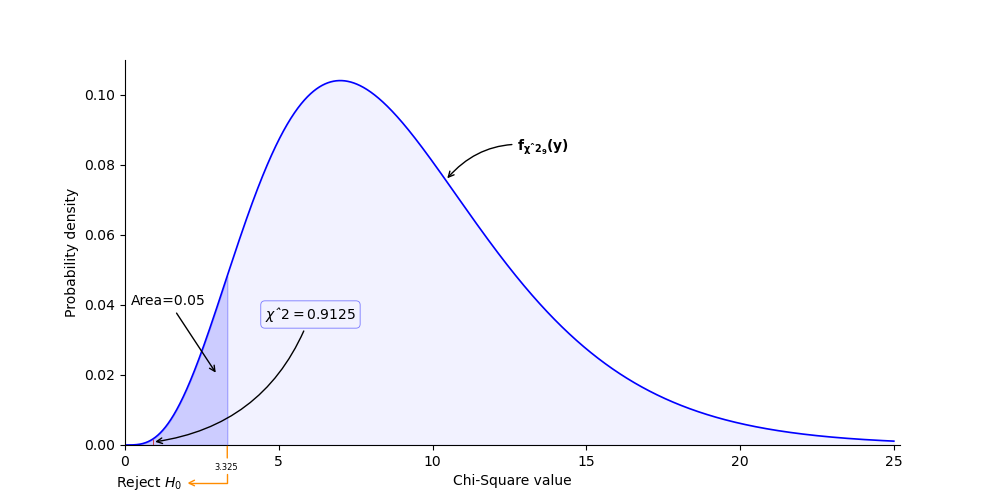

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from matplotlib.font_manager import FontProperties
font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
x = np.linspace(0, 25, 10000)
degrees_of_freedom = 9
alpha = 0.05

# create the chisquare distribution
chisquare_dist = chi2.pdf(x, degrees_of_freedom)
chisquare_value = 0.8905

# test statistic
test_statistic = 0.9125
dist_colour = 'b'
reject_colour = 'darkorange'

# round the critical value to 3 decimal places
critical_value = round(chi2.ppf(alpha , degrees_of_freedom), 3)
print(f'critical value={critical_value}')
fig, ax = plt.subplots(figsize=(10, 5))

# plot the chi-square distribution with degrees_of_freedom
ax.plot(x, chisquare_dist ,
        linewidth=1.2,
        color=dist_colour)

# set the x and y-axis label
ax.set_ylabel('Probability density')
ax.set_xlabel('Chi-Square value')

# annotate the rejection area for a lower one-tailed test
ax.annotate(r'Area=0.05',
            xy=(3, 0.02), xycoords='data',
            xytext=(0.2, 0.04), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3")
            )

# set the critical region - rejection area
ax.fill_between(x, chisquare_dist ,
                where=(x < critical_value), alpha=0.2, color=dist_colour)
ax.fill_between(x, chisquare_dist ,
                where=(x > critical_value), alpha=0.05, color=dist_colour)

# annotate the probability density function for Chi-Square distribution
ax.annotate(r'$\mathbf{f_{\chiˆ2_' + f'{degrees_of_freedom}' + r'}(y)}$',
            xy=(10.42, 0.0756), xycoords='data',
            xytext=(12.76, 0.0842), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3 ,rad=0.3"))

# annotate the decision rule to reject the null hypothesis
ax.annotate('',
            xy=(critical_value, 0.00042), xycoords='data',
            xytext=(critical_value, -0.0045), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3",
                            color=reject_colour),
                            annotation_clip=False)

ax.annotate(r'Reject $H_0$',
            xy=(critical_value , -0.0075), xycoords='data',
            xytext=(-0.3, -0.012), textcoords='data',
            arrowprops=dict(arrowstyle="<-",
                            connectionstyle="angle ,angleA=180,angleB=-90,rad=0",
                            color=reject_colour),
                            annotation_clip=False)

# indicate the test statistic value
plt.vlines(test_statistic , 0, 0.0016, linewidth=0.6, colors='tab:red')

# annotate the chi-square value
ax.annotate(r'$\chiˆ2=' + f'{test_statistic}' + r'$',
            xy=(chisquare_value , 0.0008), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec=dist_colour,
                      alpha=0.5, linewidth=0.6),
            xytext=(4.55, 0.036), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3 ,rad=-0.3"))

# indicate the critical value on the x-axis
plt.text(2.9, -0.007, f'{critical_value}', fontsize=6)

# scale the axis to show only the relevant area
plt.axis([0, 25.2, 0, 0.11])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()